In [1]:
import spotipy
import spotipy.util as util
import pandas as pd
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import operator

df = pd.read_csv('./top_200_table.csv', sep='\t')
df

,Unnamed: 0,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,...,2018-04-18,2018-04-19,2018-04-20,2018-04-21,2018-04-22,2018-04-23,2018-04-24,2018-04-25,2018-04-26,2018-04-27
0,0,"1,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","1,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","1,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","1,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","1,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","1,""Shape of You"",""Ed Sheeran"",1517787,https://...","1,""Shape of You"",""Ed Sheeran"",1437473,https://...","1,""Shape of You"",""Ed Sheeran"",1346146,https://...","1,""Shape of You"",""Ed Sheeran"",1532772,https://...",...,"1,""Nice For What"",Drake,2784404,https://open.s...","1,""Nice For What"",Drake,2704756,https://open.s...","1,KOD,""J. Cole"",4233070,https://open.spotify.c...","1,KOD,""J. Cole"",2537308,https://open.spotify.c...","1,""Nice For What"",Drake,2232935,https://open.s...","1,""Nice For What"",Drake,2494495,https://open.s...","1,""Nice For What"",Drake,2545158,https://open.s...","1,""Nice For What"",Drake,2369585,https://open.s...","1,""Nice For What"",Drake,2351522,https://open.s...","1,Paranoid,""Post Malone"",3694438,https://open...."
1,1,"2,""Fake Love"",Drake,1180074,https://open.spoti...","2,""Fake Love"",Drake,1076575,https://open.spoti...","2,""Fake Love"",Drake,1171625,https://open.spoti...","2,""Fake Love"",Drake,1179471,https://open.spoti...","2,""Fake Love"",Drake,1179992,https://open.spoti...","2,""Castle on the Hill"",""Ed Sheeran"",1472037,ht...","2,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","2,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","2,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...",...,"2,""God's Plan"",Drake,1801908,https://open.spot...","2,""God's Plan"",Drake,1787101,https://open.spot...","2,Photograph,""J. Cole"",3561388,https://open.sp...","2,""Nice For What"",Drake,2505932,https://open.s...","2,KOD,""J. Cole"",1997552,https://open.spotify.c...","2,KOD,""J. Cole"",2314828,https://open.spotify.c...","2,KOD,""J. Cole"",2180639,https://open.spotify.c...","2,KOD,""J. Cole"",1928183,https://open.spotify.c...","2,KOD,""J. Cole"",1764366,https://open.spotify.c...","2,""Better Now"",""Post Malone"",3467168,https://o..."
2,2,"3,Starboy,""The Weeknd"",1064351,https://open.sp...","3,Starboy,""The Weeknd"",963602,https://open.spo...","3,Starboy,""The Weeknd"",1064931,https://open.sp...","3,Starboy,""The Weeknd"",1086272,https://open.sp...","3,Starboy,""The Weeknd"",1068015,https://open.sp...","3,""Bad and Boujee (feat. Lil Uzi Vert)"",Migos,...","3,""Fake Love"",Drake,1180717,https://open.spoti...","3,""Fake Love"",Drake,1123166,https://open.spoti...","3,""Fake Love"",Drake,1157963,https://open.spoti...",...,"3,""I Like It"",""Cardi B"",1629604,https://open.s...","3,""Psycho (feat. Ty Dolla $ign)"",""Post Malone""...","3,ATM,""J. Cole"",3408026,https://open.spotify.c...","3,ATM,""J. Cole"",2223642,https://open.spotify.c...","3,ATM,""J. Cole"",1771037,https://open.spotify.c...","3,ATM,""J. Cole"",2065871,https://open.spotify.c...","3,ATM,""J. Cole"",1805005,https://open.spotify.c...","3,""Kevin’s Heart"",""J. Cole"",1623076,https://op...","3,""God's Plan"",Drake,1611225,https://open.spot...","3,""Spoil My Night"",""Post Malone"",3318588,https..."
3,3,"4,Closer,""The Chainsmokers"",1010492,https://op...","4,Closer,""The Chainsmokers"",782423,https://ope...","4,Closer,""The Chainsmokers"",857394,https://ope...","4,Closer,""The Chainsmokers"",856349,https://ope...","4,Closer,""The Chainsmokers"",860364,https://ope...","4,""Fake Love"",Drake,1217137,https://open.spoti...","4,""Castle on the Hill"",""Ed Sheeran"",1127503,ht...","4,Starboy,""The Weeknd"",933303,https://open.spo...","4,""Castle on the Hill"",""Ed Sheeran"",1016935,ht...",...,"4,""Psycho (feat. Ty Dolla $ign)"",""Post Malone""...","4,""I Like It"",""Cardi B"",1582355,https://open.s...","4,Motiv8,""J. Cole"",3357778,https://open.

In [2]:
all_columns = df.columns
new_table = []
i = "01"

for column in all_columns:
    if column == ('2018-04-%s' %i):
        if((int(i) + 1) < 10):
            i = ("0" + str(int(i) + 1))
            for row in df[column]:
                new_table.append(row.split(','))
        else:
            i = str(int(i) + 1)
            for row in df[column]:
                new_table.append(row.split(','))

#get all artists in top 200 for the month of april this year
number1_april_2018 = []
m = 0
for song in new_table:
    for parameter in song:
        number1_april_2018.append(new_table[m][2])
    m = m + 1
print(number1_april_2018)
print(len(number1_april_2018))

['"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', 'Drake', 'Drake', 'Drake', 'Drake', 'Drake', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"Post Malone"', '"Post Malone"', '"Post Malone"', '"Post Malone"', '"Post Malone"', 'XXXTENTACION', 'XXXTENTACION', 'XXXTENTACION', 'XXXTENTACION', 'XXXTENTACION', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"BlocBoy JB"', '"BlocBoy JB"', '"BlocBoy JB"', '"BlocBoy JB"', '"BlocBoy JB"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"Rich The Kid"', '"Rich The Kid"', '"Rich The Kid"', '"Rich The Kid"', '"Rich The Kid"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"The Weeknd"', '"Lil Dicky"', '"Lil Dicky"', '"Lil Dicky"', '"Lil Dicky"', '"Lil Dicky"', 'Khalid', 'Khalid', 'Khalid', 'Khalid', 'Khalid', 'XXXTENTACION'

In [25]:
#counts up the number of times an artist apears in the previous list
from collections import defaultdict
total_check = 0
ranked_2018_april = defaultdict(int)

for artist in number1_april_2018:
    ranked_2018_april[artist] += 1
    total_check += 1

#for whatever reason the list in the above cell repeats itself 5 times, dunno what causes this but dividing by five gives us much more accurate results
for artist in ranked_2018_april:
    ranked_2018_april[artist] = ranked_2018_april[artist] / 5

#sorting the results so they will display largest number of appearences first
sorted_artists = sorted(ranked_2018_april.items(), key=operator.itemgetter(1), reverse=True)
top_20_ranked_april = (sorted_artists[:20])#looking at only top 20 so the graph looks nice
print(top_20_ranked_april)
print(total_check/5)

[('"Cardi B"', 302.0), ('XXXTENTACION', 260.0), ('"The Weeknd"', 211.0), ('"Post Malone"', 205.0), ('Migos', 134.0), ('"J. Cole"', 131.0), ('"Kendrick Lamar"', 123.0), ('Drake', 118.0), ('Khalid', 115.0), ('Logic', 104.0), ('"Lil Skies"', 88.0), ('"Rich The Kid"', 85.0), ('6ix9ine', 84.0), ('"Imagine Dragons"', 75.0), ('"Lil Uzi Vert"', 73.0), ('G-Eazy', 69.0), ('Bazzi', 58.0), ('"Camila Cabello"', 55.0), ('Marshmello', 54.0), ('"Famous Dex"', 54.0)]
5431.6


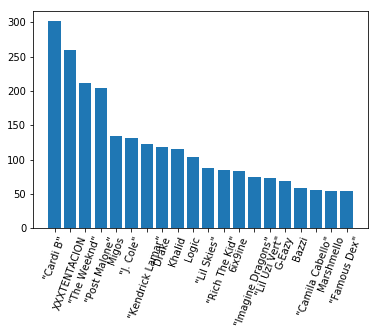

In [26]:
plt.bar(range(len(top_20_ranked_april)), [val[1] for val in top_20_ranked_april], align='center')
plt.xticks(range(len(top_20_ranked_april)), [val[0] for val in top_20_ranked_april])
plt.xticks(rotation=70)
plt.show()